<h3>This is the Daily prediction of Google stock you can choose any stock data and change it's symbol in the code below</h3>

Importing libraries -

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from dateutil.parser import parse

Import your own Aplha Vantage API key and the symbol of the stock you want to predict the data of - 

In [106]:
api_key = "AABCA71GGJ5WS2LZ"
symbols = ["GOOGL"]

Initialize empty DataFrames to store data for all stocks

In [107]:
dfs = []

Define the API url for the current stock and make a GET request to retreive the data

In [108]:
for symbol in symbols:
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}"
    r = requests.get(url)
    data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'GOOGL', '3. Last Refreshed': '2023-09-28', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-09-28': {'1. open': '129.8400', '2. high': '133.3000', '3. low': '129.7900', '4. close': '132.3100', '5. volume': '22179507'}, '2023-09-27': {'1. open': '128.5700', '2. high': '130.8950', '3. low': '128.5700', '4. close': '130.5400', '5. volume': '22746452'}, '2023-09-26': {'1. open': '129.7700', '2. high': '130.3645', '3. low': '127.2200', '4. close': '128.5650', '5. volume': '25718704'}, '2023-09-25': {'1. open': '129.8300', '2. high': '131.1700', '3. low': '128.9600', '4. close': '131.1100', '5. volume': '20094643'}, '2023-09-22': {'1. open': '130.7600', '2. high': '132.0250', '3. low': '129.6000', '4. close': '130.2500', '5. volume': '26397337'}, '2023-09-21': {'1. open': '131.4400', '2. high': '132.2300', '3. low': '130.0700', '4. close': '130.4400', '

Check if 'Time Series (Daily)' availabe in data and Convert data into dataframe and sort dataframe by the date

In [113]:
daily_data = data['Time Series (Daily)']
df = pd.DataFrame.from_dict(daily_data, orient="index")

Extract the 'Close' prices

In [114]:
if '4. close' in df:
    close_prices = df['4. close'].astype(float)

Normalize the 'Close' prices

In [115]:
scaler = MinMaxScaler()
close_prices_normalized = scaler.fit_transform(close_prices.values.reshape(-1, 1))

Define sequence length and split data into sequences

In [116]:
sequence_length = 10
sequences = []
next_day_close_prices = []

for i in range(len(close_prices_normalized) - sequence_length):
    sequences.append(close_prices_normalized[i:i + sequence_length])
    next_day_close_prices.append(close_prices_normalized[i + sequence_length])

Convert lists to NumPy arrays

In [117]:
X = np.array(sequences)
y = np.array(next_day_close_prices)

Split the data into training and testing sets

In [118]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

Build an LSTM model

In [119]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

Train the model

In [140]:
model.fit(X_train, y_train, epochs=250, batch_size=64)

Epoch 1/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 2/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 3/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 4/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 5/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 6/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 7/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 8/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 9/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 10/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 11/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 12/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 13/250
2/2 [==============================] - 0s 8ms/st

2/2 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 207/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 208/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 209/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 210/250
2/2 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 211/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 212/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 213/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 214/250
2/2 [==============================] - 0s 9ms/step - loss: 0.0037
Epoch 215/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 216/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 217/250
2/2 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 218/250
2/2 [==============================] - 0

Make predictions

In [141]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 15ms/step


Inverse transform predictions to original scale

In [142]:
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test)

Calculate Mean Squared Error (MSE) as an evaluation metric

In [143]:
mse = mean_squared_error(y_test_original, predictions)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 11.618385298989384


Plot actual vs. predicted prices

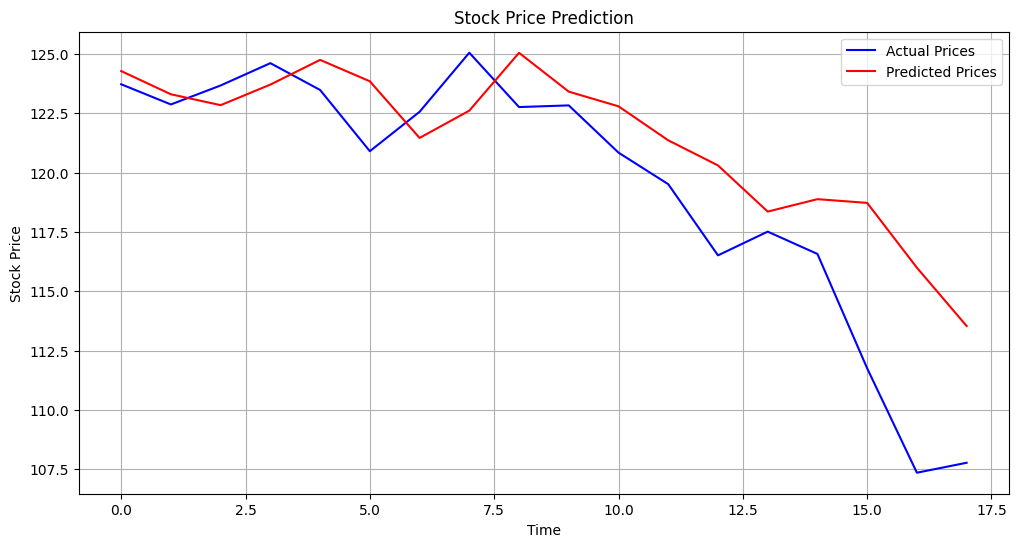

In [144]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()